# Models of Neural Systems Computer Practical 2

## Hopfield Network

### 1. Store the following three patterns A, B, and C in the Hopfield network.

Hebb’s rule states that a set of patterns {$S^{K}$} can be stored in the network by setting the weight between
units i and j to $$w_{ij} = w_{ji} =\sum_{K} s^{K}_{i}s^{K}_{j}$$
No unit has a connection with itself (self-connection), so $w_{ii}$ = 0; for all i.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
A = np.array([1, -1, 1, -1])
B = np.array([-1, 1, 1, 1])
C = np.array([-1, -1, -1, 1])
x = np.array([A,B,C])
print(x)

[[ 1 -1  1 -1]
 [-1  1  1  1]
 [-1 -1 -1  1]]


#### What are the resulting weights?

In [3]:
def get_initial_weight(X):
    W = X.T.dot(X) # considering number of patterns
    np.fill_diagonal(W,0) # No unit has a connection with itself
    return W

W = get_initial_weight(x)
print(W)

[[ 0 -1  1 -3]
 [-1  0  1  1]
 [ 1  1  0 -1]
 [-3  1 -1  0]]


#### Which of the patterns are stable states of the network dynamics?

In [4]:
def update_pattern_unit(W,P):
    return np.sign(W.dot(P))

def check_pattern_stability(P,S):
    return np.all(P == S) # if all the states of initial pattern matches with the final state, then stable

print('Initial State of Pattern : ' , A)
A1 = update_pattern_unit(W,A) 
print('Updated State of Pattern : ' , A1)
print("Pattern A is Stable : ", check_pattern_stability(A,A1))
print("-------------------------")
print('Initial State of Pattern : ' , B)
B1 = update_pattern_unit(W,B) 
print('Updated State of Pattern : ' , B1)
print("Pattern B is Stable : ", check_pattern_stability(B,B1))
print("-------------------------")
print('Initial State of Pattern : ' , C)
C1 = update_pattern_unit(W,C) 
print('Updated State of Pattern : ' , C1)
print("Pattern C is Stable : ", check_pattern_stability(C,C1))
print("-------------------------")

Initial State of Pattern :  [ 1 -1  1 -1]
Updated State of Pattern :  [ 1 -1  1 -1]
Pattern A is Stable :  True
-------------------------
Initial State of Pattern :  [-1  1  1  1]
Updated State of Pattern :  [-1  1 -1  1]
Pattern B is Stable :  False
-------------------------
Initial State of Pattern :  [-1 -1 -1  1]
Updated State of Pattern :  [-1  1 -1  1]
Pattern C is Stable :  False
-------------------------


- Pattern A is stable : since the resulting state is matching the initial state after state update 
- Pattern B and C are unstable : as the resulting state is NOT matching the initial state

#### Which patterns do the unstable states converge to? (Hint: Apply the stored pattern as input and determine if they persist to the next iterations.)

In [5]:
def converging_pattern_for_unstable_states(W,P):
    S = P
    for i in range (1000): # considering it pattern will become stable after 1000 iterations
        S_i = update_pattern_unit(W,S)
        if(np.all(S_i == S)) : # if the state matches the previous state, then break
            S = S_i
            break
        S = S_i
    return S,i 

print("Unstable state : ", B)
B1,i = converging_pattern_for_unstable_states(W,B)
print("Converging Stable state: ", B1) 
print("-------------------------")
print("Unstable state : ", C)
C1,i = converging_pattern_for_unstable_states(W,C)
print("Converging Stable state: ", C1) 
print("-------------------------")

Unstable state :  [-1  1  1  1]
Converging Stable state:  [-1  1 -1  1]
-------------------------
Unstable state :  [-1 -1 -1  1]
Converging Stable state:  [-1  1 -1  1]
-------------------------


After a number of iteration the unstable state of both the pattern B and C, converges to the inverse of pattern A

### 2. Consider the following energy function for the network: $$E = - \sum_{i}\sum_{j} w_{ij}s_{i}s_{j}$$ Calculate the energy after each update step and plot it as a function of time. (Hint: The energy should decrease after each update or remain the same in case of no update.)

In [6]:
def energy(W, S):
    return -np.sum(np.sum(W.dot(S).dot(S)))

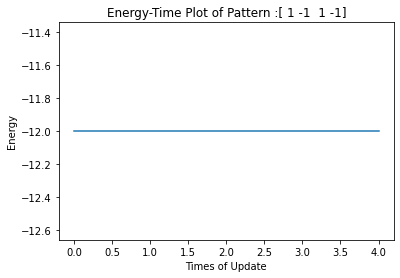

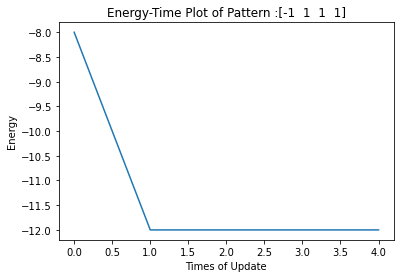

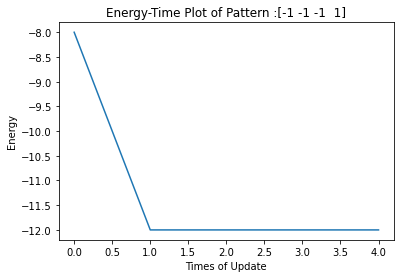

In [7]:
def get_energy(W,S,iteration):
    E = np.zeros([iteration])
    for i in range(iteration):
        E[i] = energy(W,S)
        S = update_pattern_unit(W,S)
    return E

def energy_time_plot(W,S,iteration):
    plt.title("Energy-Time Plot of Pattern :" + np.array2string(S))
    E = get_energy(W,S,iteration)
    plt.plot(E)
    plt.xlabel('Times of Update')
    plt.ylabel('Energy')
    plt.show()

    
energy_time_plot(W,A, 5)
energy_time_plot(W,B, 5)
energy_time_plot(W,C, 5)

### 3. Finally, you will reuse the code developed for the toy example above to store and recall image patterns in a larger Hopfield network.

#### 1. Load the numpy file ’images.npz’ in ipython. (Hint: np.load() will return a 3D array with dimensions (k,v,h), where k is the number of patterns, v and h are the vertical and horizontal dimensions of the image.)

8 30 40


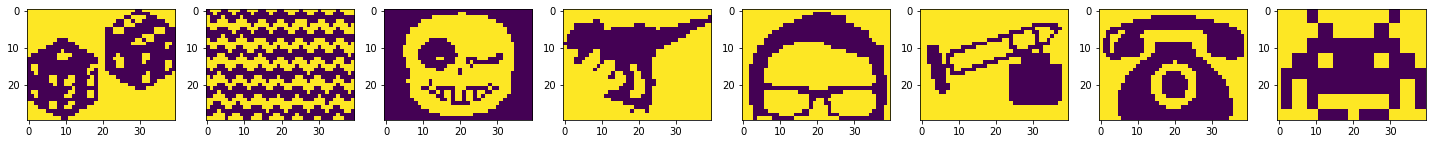

In [8]:
images = np.load("images.npz")["arr_0"]
k = images.shape[0] # number of patterns
v = images.shape[1] # vertical dimension of image
h = images.shape[2] # horizontal dimension of image
print(k,v,h)
fig, axes = plt.subplots(nrows=1, ncols=k, figsize=(20, 6))
for i in range(k):
    axes[i].imshow(images[i])
    fig.tight_layout()


#### 2. Apply equation 2 to store the patterns into a weight matrix W = {$w_{ij}$}. (Hint(s): You will have to flatten the images from 2 dimensions into vectors. Applying matrix multiplication is always preferable than iteration over elements.)

In [9]:
compressed_images = images.reshape((k, v*h))
W_images = get_initial_weight(compressed_images)
print(W_images)

[[0. 6. 6. ... 6. 8. 8.]
 [6. 0. 8. ... 4. 6. 6.]
 [6. 8. 0. ... 4. 6. 6.]
 ...
 [6. 4. 4. ... 0. 6. 6.]
 [8. 6. 6. ... 6. 0. 8.]
 [8. 6. 6. ... 6. 8. 0.]]


#### 3. Which patterns are (un)stable?

Pattern  1 is Stable :  True
Pattern  2 is Stable :  True
Pattern  3 is Stable :  False
Pattern  4 is Stable :  True
Pattern  5 is Stable :  True
Pattern  6 is Stable :  True
Pattern  7 is Stable :  True
Pattern  8 is Stable :  True


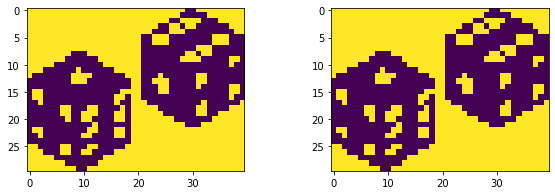

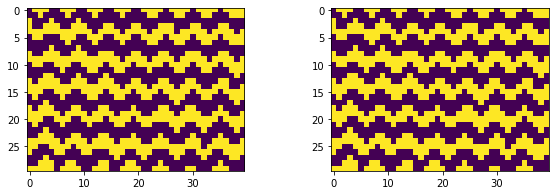

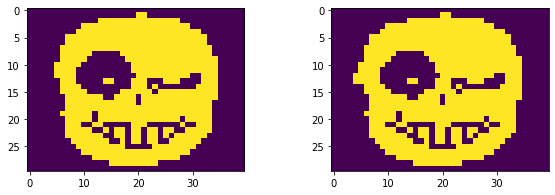

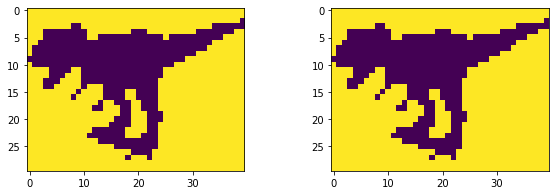

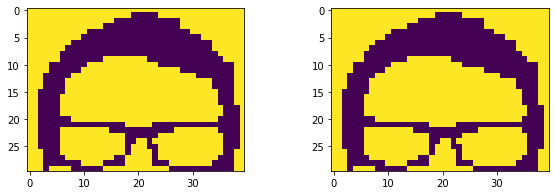

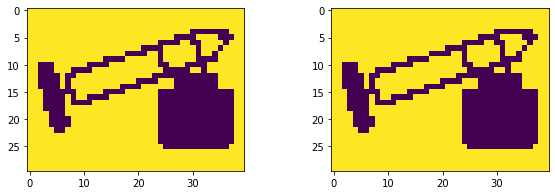

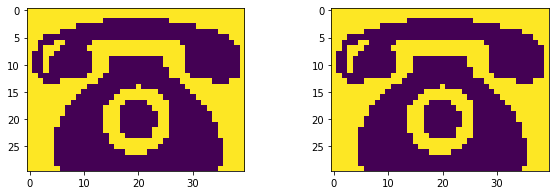

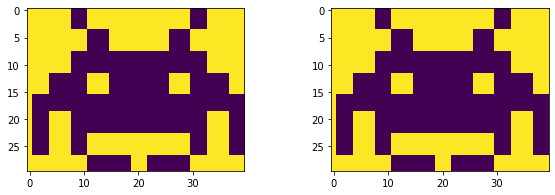

In [10]:
def check_stabilty_images(images):
    for i in range(images.shape[0]):
        updated_image_pattern = update_pattern_unit(W_images,images[i])
        print("Pattern ",i+1, "is Stable : ", check_pattern_stability(images[i],updated_image_pattern))
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
        axes[0].imshow(images[i].reshape(v,h))
        axes[1].imshow(updated_image_pattern.reshape(v,h))

check_stabilty_images(compressed_images)

#### 4. Start with a pattern consisting of random values +-1 and update according to the rule in Equation 3 until reaching a stable state. Plot the initial pattern, the final stable state of the network, and the energy function over iterations. Repeat this step several times with different random initial patterns. (Hint: Before plotting you should reshape the patterns from 1D arrays into 2D arrays using the method reshape((v,h)). For plotting, you can use pyplot.imshow(M), where M is a 2D array.)

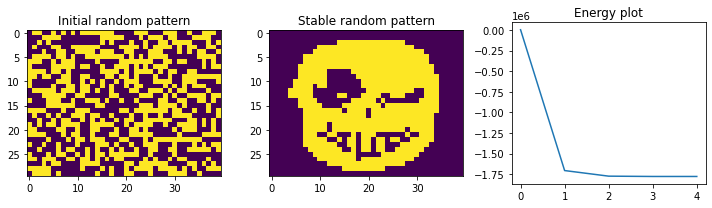

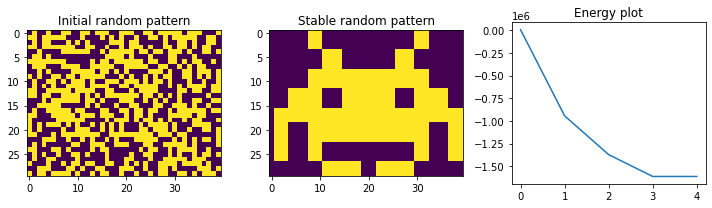

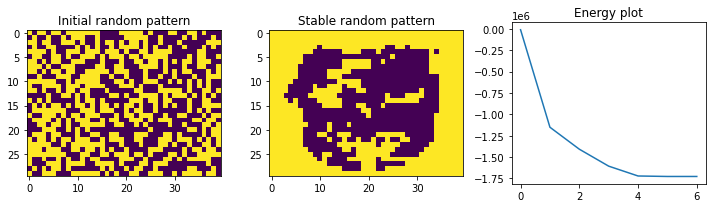

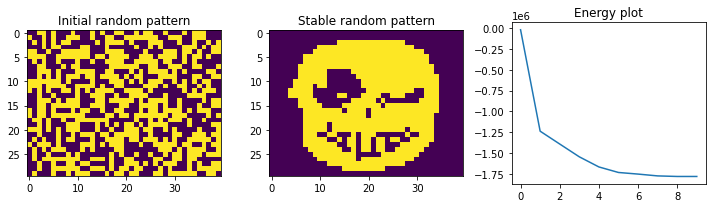

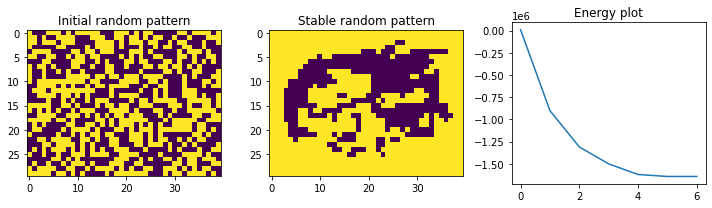

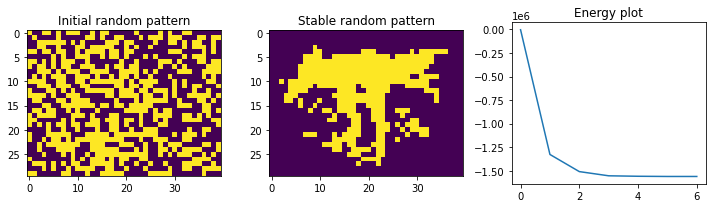

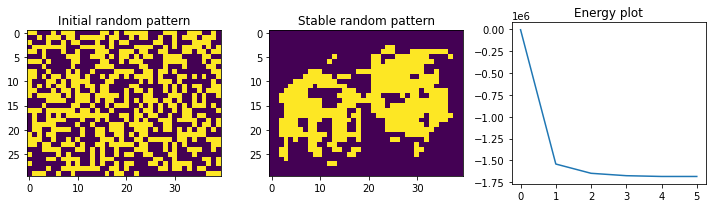

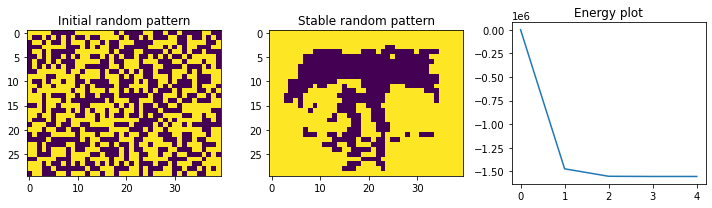

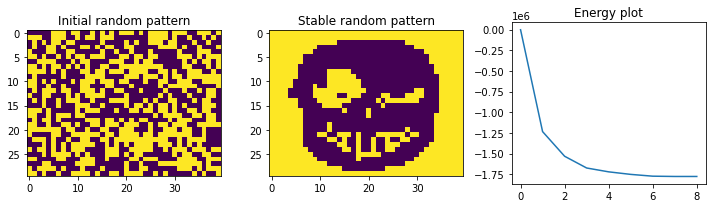

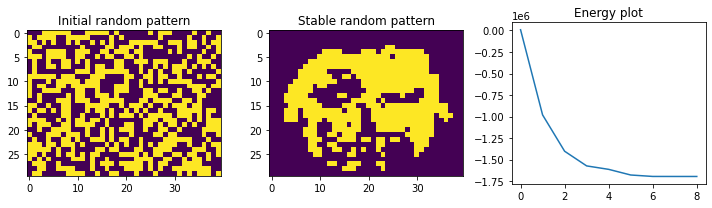

In [11]:
np.random.seed(2)

def stabilize_image_energy(W, image):
    stable_image, iteration = converging_pattern_for_unstable_states(W, image)
    E = get_energy(W,image,iteration+2) # iteration + 2 to get few extra energy-time data
    I = image.reshape((v,h))
    F = stable_image.reshape((v,h))
    return E, I, F

def plot_pattern_energy(E, I, F):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
    axes[0].imshow(I)
    axes[1].imshow(F)
    axes[2].plot(E)
    axes[0].set_title("Initial random pattern")
    axes[1].set_title("Stable random pattern")
    axes[2].set_title("Energy plot")
    fig.tight_layout()

for i in range(10): #  Repeat this step several times with different random initial patterns. 
    random_image = np.random.choice([-1,1], size=(1200,))
    E, I, F = stabilize_image_energy(W_images, random_image)
    plot_pattern_energy(E, I, F)

#### 5. As in the last task, create a random vector of length n. Copy a part of one memory (e.g.,25%) and fill it into the random vector. The created vector can be used as a cue to recall content-addressable memory. Use it as an initial pattern and update the network repeatedly until reaching a stable state. Plot the initial and final patterns and the energy function.

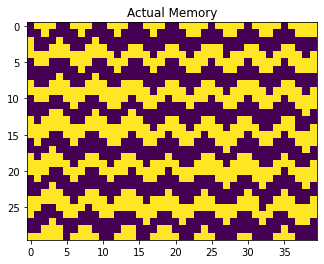

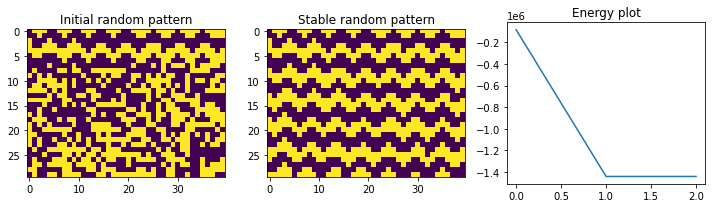

In [12]:
np.random.seed(1)
random_vector = np.random.choice([-1,1], size=(1200,))
memory_considered = images[1].reshape(v*h) # considering a satble memory
plt.imshow(memory_considered.reshape((v,h)))
plt.title("Actual Memory")
percentage_memory_length = int(25/100*(v*h))
random_vector[0:(percentage_memory_length+1)]= memory_considered[0:(percentage_memory_length+1)]

E, I, F = stabilize_image_energy(W_images, random_vector)
plot_pattern_energy(E, I, F)